In [1]:
import pandas as pn

C:\Users\abhis\AppData\Local\Temp\ipykernel_2788\908774910.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pn


In [2]:

df=pn.read_csv("/content/Housing.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/Housing.csv'

In [ ]:
# df.head()
# df.fillna(0)
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

                     price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area              0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating   0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefarea          0.329777  

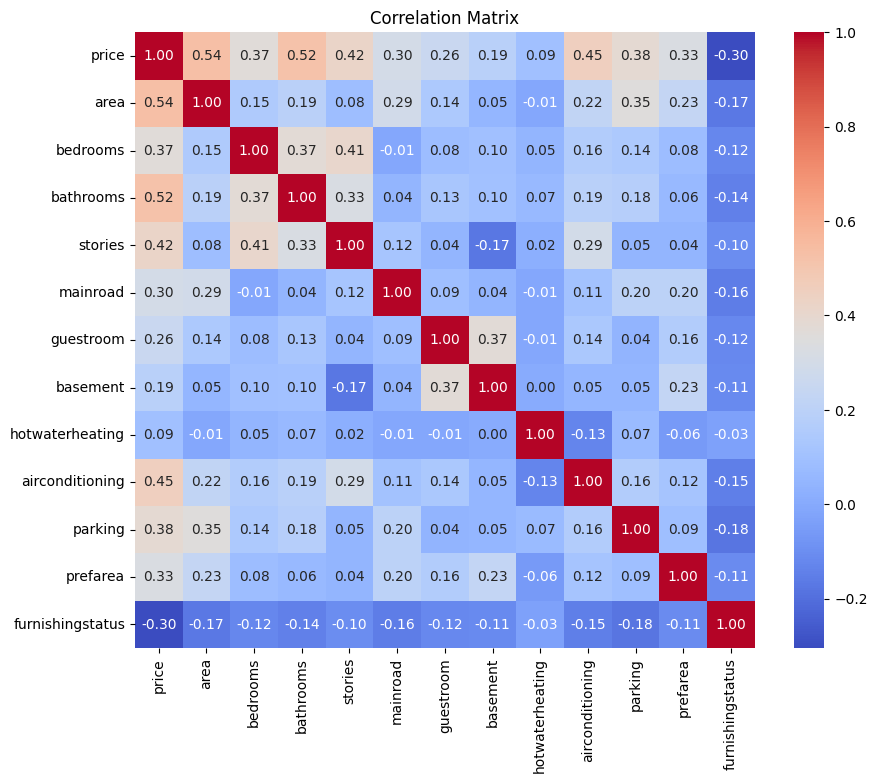

In [ ]:
# Convert string columns to numeric representation
# You can use LabelEncoder or One-Hot Encoding depending on the nature of your data
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Iterate through each object column and convert it to numeric
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Now, all string columns have been converted to numeric representation

# Calculate correlation matrix
correlation_matrix = df.corr()

# Print or visualize the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
correlation_matrix["price"]

price               1.000000
area                0.535997
bedrooms            0.366494
bathrooms           0.517545
stories             0.420712
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
airconditioning     0.452954
parking             0.384394
prefarea            0.329777
furnishingstatus   -0.304721
Name: price, dtype: float64

# Find value which maximum No of correlation for **price** **bold text**

In [ ]:
data=correlation_matrix["price"]
datas=data[1:]
datas.max()

0.5359973457780797

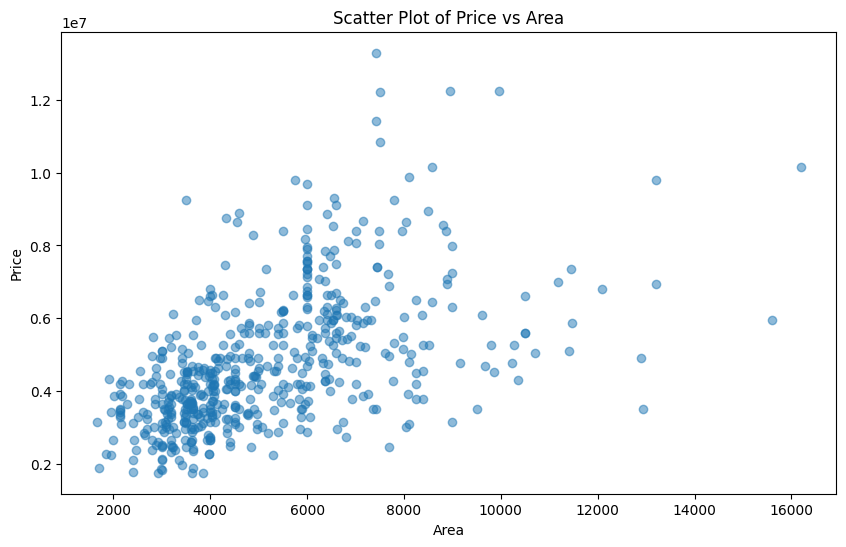

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for price and area
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['price'], alpha=0.5)
plt.title('Scatter Plot of Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
# plt.grid(True)
plt.show()


In [ ]:
from sklearn import linear_model

reg=linear_model.LinearRegression()

x=df[['area']]  #independent Attribute
y=df.price  #dependent Attribute

reg.fit(x,y)


LinearRegression()

In [ ]:
area_to_predict = 5555
predicted_price = reg.predict([[area_to_predict]])

print("Predicted price for an area of 5555 sq.ft:", predicted_price)

Predicted price for an area of 5555 sq.ft: [4953579.02008174]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Mean Squared Error: 3675286604768.185
R-squared Score: 0.27287851871974644


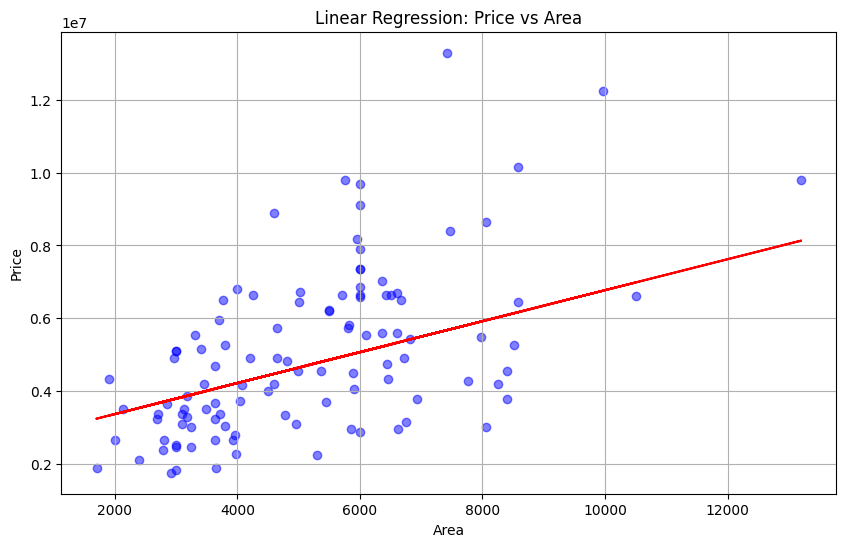

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Split Data
X = df[['area']]  # Feature matrix (independent variable)
y = df['price']   # Target vector (dependent variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Create and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred = model.predict(X_test)

# Step 4: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Step 5: Plot the Regression Line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5)
plt.plot(X_test, y_pred, color='red')
plt.title('Linear Regression: Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.grid(True)
plt.show()
